In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
X = df[['sepal length (cm)', 'petal width (cm)', 'petal length (cm)', 'petal width (cm)']].copy()

In [7]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

In [8]:
### centri dei cluster
model.cluster_centers_

array([[7.57777778, 2.04444444, 6.42222222, 2.04444444],
       [5.2875    , 1.0625    , 3.4625    , 1.0625    ],
       [5.006     , 0.246     , 1.462     , 0.246     ],
       [5.63      , 1.295     , 4.16      , 1.295     ],
       [6.53      , 1.78      , 5.44      , 1.78      ],
       [6.4047619 , 1.42857143, 4.60952381, 1.42857143],
       [6.66111111, 2.27777778, 5.61666667, 2.27777778],
       [5.95714286, 1.85714286, 4.97142857, 1.85714286]])

In [10]:
import seaborn as sns

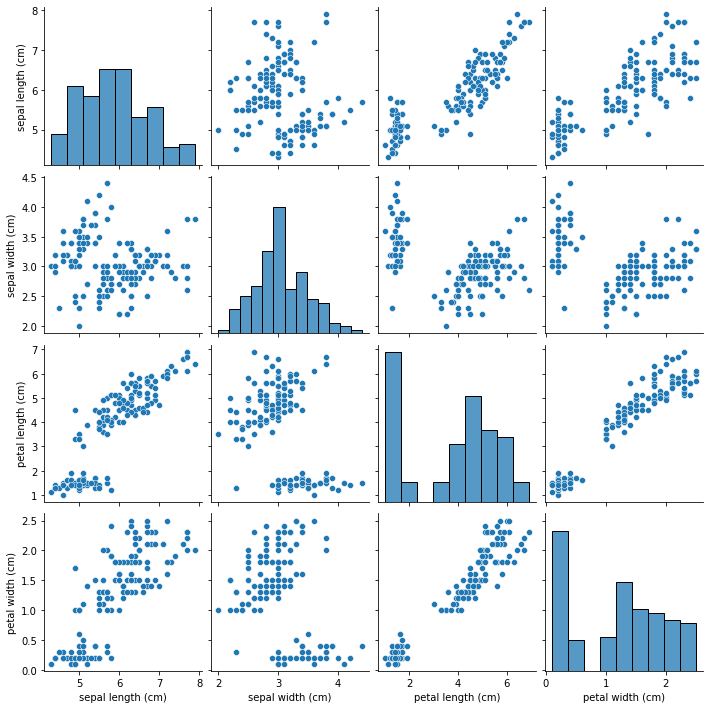

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
labels = pd.Series(model.labels_, index=X.index, name='labels')
labels_df = X.join(labels)
display(labels_df)

,sepal length (cm),petal width (cm),petal length (cm),petal width (cm),labels
0,5.1,0.2,1.4,0.2,2
1,4.9,0.2,1.4,0.2,2
2,4.7,0.2,1.3,0.2,2
3,4.6,0.2,1.5,0.2,2
4,5.0,0.2,1.4,0.2,2
...,...,...,...,...,...
145,6.7,2.3,5.2,2.3,6
146,6.3,1.9,5.0,1.9,7
147,6.5,2.0,5.2,2.0,4
148,6.2,2.3,5.4,2.3,6


In [16]:
### centri dei cluster
model.inertia_

25.515717460317454

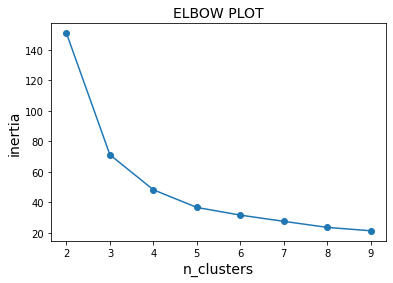

In [17]:
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


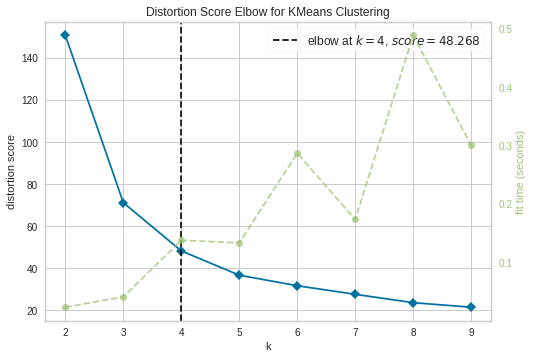

In [18]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [19]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))


Avg Sihlouette Score (k=2): 0.6980560945690437 
Avg Sihlouette Score (k=3): 0.588577977782594 
Avg Sihlouette Score (k=4): 0.5412984719425896 
Avg Sihlouette Score (k=5): 0.5427870665293485 
Avg Sihlouette Score (k=6): 0.5242737475475167 



Avg Sihlouette Score:  0.6980560945690437


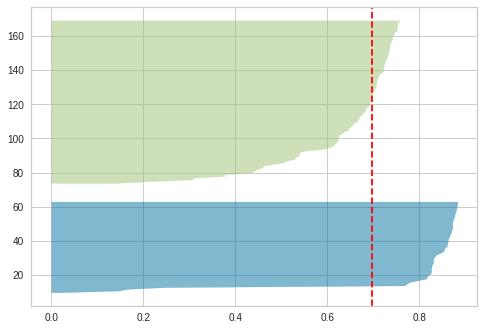


Avg Sihlouette Score:  0.588577977782594


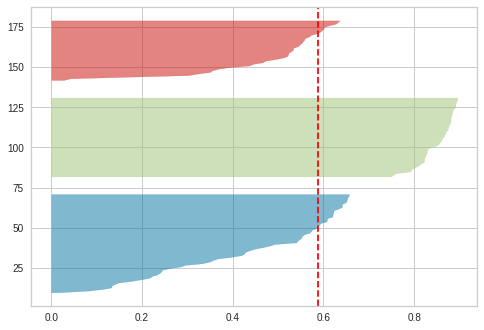


Avg Sihlouette Score:  0.5412984719425896


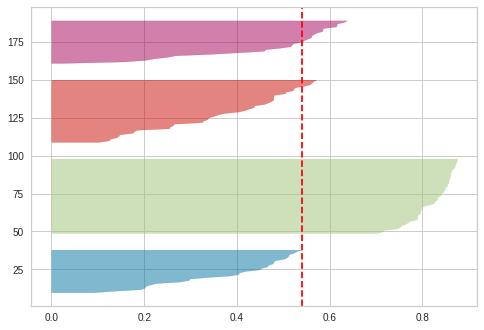


Avg Sihlouette Score:  0.5427870665293485


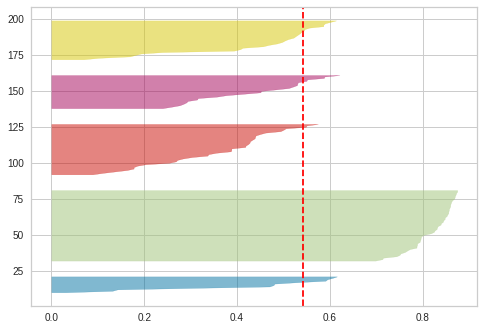


Avg Sihlouette Score:  0.5208102823355104


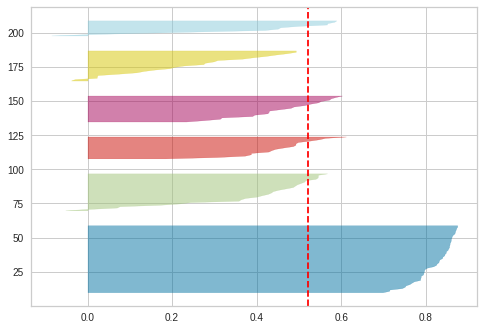

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

    